# Can we use Best - Fitting - Line concept for Classification?

Yes. If the line equation is modified slightly

"Logistic Regression" uses Sigmoid function.

A Sigmoid function, takes any real value between zero and one. It is defined as

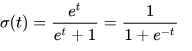

OR SIMPLY

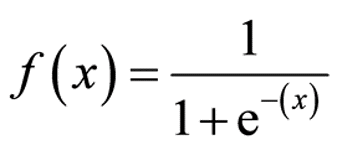
And if we plot it, the graph will be S curve,



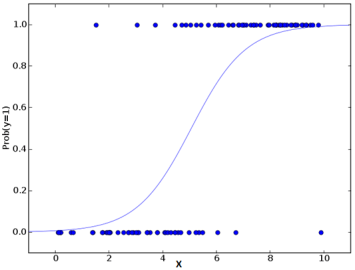

In [2]:
import pandas as pd
import seaborn as sns

df=pd.read_csv("./datasets/original.csv")

In [3]:
#samples 


df.sample(  5  )

,clientid,income,age,loan,default
1240,1241,42591.595235,45.116560,4602.245841,0
1969,1970,56441.016244,43.206991,9043.756044,0
1304,1305,22372.505236,31.493050,1118.926064,0
1629,1630,42775.525507,39.227083,6145.987757,0
1420,1421,41103.136917,63.079507,3644.301903,0


In [4]:
#number of missing values


df.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [6]:
df.shape

(1997, 6)

In [7]:
#data bias


df['default'].value_counts(normalize=True)

0    0.858287
1    0.141713
Name: default, dtype: float64

In [8]:
#2 points

features=df[["income","age","loan"]] #best contributors!
label=df[['default']]

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression() #Decision Tree

In [11]:
model.fit(x_train,y_train)

/home/harshit/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [12]:
model.score(x_test,y_test)

0.9075

In [13]:
ans=model.predict(x_test)
ans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
predicted=pd.DataFrame(ans)
predicted.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [15]:
actual_test=pd.DataFrame(y_test).reset_index(drop=True)
actual_test.head(5)

,default
0,0
1,0
2,0
3,0
4,0


In [16]:
pd.concat([predicted,actual_test],axis=1).sample(5)

,0,default
378,0,0
336,1,1
241,0,0
64,0,0
177,0,0


In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(actual_test,predicted)

0.9075

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual_test,predicted)

array([[333,   5],
       [ 32,  30]])